In [126]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import sys
import timedelta

In [127]:
np.set_printoptions(threshold=40)

In [128]:
# Uploading data
data = pd.read_csv('Online Retail.csv',parse_dates=['InvoiceDate'])
data['Total_Price'] = data['Quantity'] * data['UnitPrice']
data['Country'] = data['Country'].astype("category")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [129]:
# Merging invoices
invoices_grouping = data.drop("Description",axis=1)
invoices_grouping = invoices_grouping.groupby("InvoiceNo")

In [130]:
#Remove returns and 0 price invoices 
def remove_returns(num:int):
    if num <= 0:
        return None
    else:
        return num

In [131]:
# Getting the price of each invoice
inv_sum = invoices_grouping.agg({"Total_Price":"sum"})
inv_sum['Total_Price'] =inv_sum['Total_Price'].apply(remove_returns)
inv_sum = inv_sum.dropna(how='any',axis='rows')
inv_sum_ser = inv_sum['Total_Price']


In [132]:
#Cleaninig invoices data 
lower_bound = .025
upper_bound = 0.975
quant = inv_sum_ser.quantile([lower_bound,upper_bound])
new_index = (quant.loc[lower_bound] < inv_sum.Total_Price.values) & (quant.loc[upper_bound] > inv_sum.Total_Price.values)
cleaned_data = inv_sum[new_index]

In [133]:
# Showing the cleaned data
cleaned_data.sort_values("Total_Price")

,Total_Price
InvoiceNo,
538283,10.29
539643,10.35
570130,10.40
548653,10.40
580739,10.44
...,...
554098,2516.57
555855,2517.44
573320,2520.28


In [134]:
# Cleaned data
cleaned_data.index.tolist()

['536365',
 '536366',
 '536367',
 '536368',
 '536369',
 '536370',
 '536371',
 '536372',
 '536373',
 '536374',
 '536375',
 '536376',
 '536377',
 '536378',
 '536380',
 '536381',
 '536382',
 '536384',
 '536385',
 '536386',
 '536388',
 '536389',
 '536390',
 '536392',
 '536393',
 '536394',
 '536395',
 '536396',
 '536397',
 '536398',
 '536399',
 '536400',
 '536401',
 '536402',
 '536403',
 '536404',
 '536405',
 '536406',
 '536407',
 '536408',
 '536409',
 '536412',
 '536415',
 '536416',
 '536420',
 '536423',
 '536425',
 '536437',
 '536446',
 '536460',
 '536463',
 '536464',
 '536466',
 '536477',
 '536488',
 '536500',
 '536502',
 '536508',
 '536514',
 '536520',
 '536522',
 '536523',
 '536524',
 '536525',
 '536526',
 '536527',
 '536528',
 '536529',
 '536530',
 '536531',
 '536532',
 '536533',
 '536534',
 '536535',
 '536536',
 '536537',
 '536538',
 '536539',
 '536540',
 '536541',
 '536542',
 '536551',
 '536556',
 '536557',
 '536558',
 '536559',
 '536560',
 '536561',
 '536562',
 '536563',
 '536564',

In [135]:
#Clean data

mask = data['InvoiceNo'].isin(cleaned_data.index)
data = data[mask]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [136]:
# Number of unique customers & The average number of orders per customer
cus_no = data["CustomerID"].nunique()
orderes_no  = data["InvoiceNo"].nunique()
avg_ordrs_cus  = round(orderes_no / cus_no,2)
avg_ordrs_cus

4.39

In [137]:
#Mean of an invoice price or average order price
round(data['Total_Price'].mean(),2)

16.59

In [138]:
#Most ordering date
order_days = data['InvoiceDate'].dt.day_name().value_counts()
order_days = order_days.sort_values()

<BarContainer object of 6 artists>

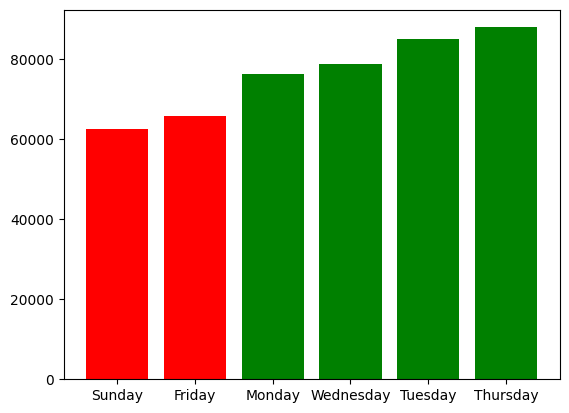

In [139]:
# Visualizing clen data and showing how revenue are in each weekday 
def colorplt(data,value):
    if value >= (sum(data)/len(data)):
        return 'green'
    else:
        return 'red'

clrs = [colorplt(order_days.values.tolist(),i) for i in order_days.values]
    
plt.bar(order_days.index,order_days.values, color=clrs)

In [140]:
# The mean of days revenue
order_days.values.mean()

76039.0

In [141]:
# The number of orders in each country
data['Country'].value_counts()

United Kingdom          416542
Germany                   8883
France                    7999
EIRE                      7312
Spain                     2447
Belgium                   2031
Portugal                  1501
Switzerland               1307
Italy                      758
Channel Islands            748
Netherlands                745
Norway                     741
Finland                    685
Australia                  543
Cyprus                     509
Unspecified                446
Austria                    398
Denmark                    344
Poland                     330
Sweden                     270
Hong Kong                  234
Iceland                    182
USA                        179
Canada                     151
Singapore                  141
Israel                     124
Greece                     113
Malta                      112
Japan                      109
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [142]:
# Which region is generating the highest revenue, and which region is generating the lowest
cntry_rev = data.groupby('Country').agg({"Total_Price":'sum'}).sort_values("Total_Price",ascending=False)
cntry_rev

,Total_Price
Country,
United Kingdom,6592925.034
Germany,215258.020
EIRE,182770.970
France,181784.080
Spain,47495.310
Belgium,41196.340
Netherlands,41071.850
Portugal,33747.100
Switzerland,30341.870


In [143]:
# Most ordered products
data['StockCode'].value_counts().nlargest(3)

85123A    2153
85099B    1936
22423     1829
Name: StockCode, dtype: int64

In [144]:
# Who are the top customers and how much do they contribute to the total revenue
cus = data.groupby('CustomerID').agg({"Total_Price":'sum'}).sort_values("Total_Price",ascending=False)
# Is the business dependent on these customers or is the customer base diversified
cus.value_counts

<bound method DataFrame.value_counts of             Total_Price
CustomerID             
14911.0       129508.83
13089.0        55120.35
15311.0        53962.43
13694.0        45782.43
17841.0        40940.46
...                 ...
15823.0           15.00
17763.0           15.00
13307.0           15.00
16878.0           13.30
17956.0           12.75

[4319 rows x 1 columns]>

In [145]:
# What is the percentage of customers who are repeating their orders

def repeated(val:int):
    if val > 1:
        return True
    else:
        return False

acus = data['CustomerID'].value_counts()
mask = acus.apply(repeated)
precentage = round((len(acus[mask])/len(acus)*100),2)
print('Precentage of reordering',precentage,str("%"))

Precentage of reordering 98.38 %


In [146]:
# For the repeat customers, how long does it take for them to place the next order after being delivered the previous one?
data1 = pd.read_csv('Online Retail.csv',parse_dates=['InvoiceDate'])

In [147]:
data1 = data1.drop_duplicates("InvoiceNo").drop(columns=['InvoiceNo','StockCode','Description','Quantity','UnitPrice','Country'])

In [148]:
data1 = data1[data1['CustomerID'].notna()]


In [149]:
dat = data1.groupby(['CustomerID','InvoiceDate']).sum()
dat

Empty DataFrame
Columns: []
Index: [(12346.0, 2011-01-18 10:01:00), (12346.0, 2011-01-18 10:17:00), (12347.0, 2010-12-07 14:57:00), (12347.0, 2011-01-26 14:30:00), (12347.0, 2011-04-07 10:43:00), (12347.0, 2011-06-09 13:01:00), (12347.0, 2011-08-02 08:48:00), (12347.0, 2011-10-31 12:25:00), (12347.0, 2011-12-07 15:52:00), (12348.0, 2010-12-16 19:09:00), (12348.0, 2011-01-25 10:42:00), (12348.0, 2011-04-05 10:47:00), (12348.0, 2011-09-25 13:13:00), (12349.0, 2011-11-21 09:51:00), (12350.0, 2011-02-02 16:01:00), (12352.0, 2011-02-16 12:33:00), (12352.0, 2011-03-01 14:57:00), (12352.0, 2011-03-01 15:47:00), (12352.0, 2011-03-01 15:49:00), (12352.0, 2011-03-01 15:52:00), (12352.0, 2011-03-17 16:00:00), (12352.0, 2011-03-22 16:07:00), (12352.0, 2011-03-22 16:08:00), (12352.0, 2011-09-20 14:34:00), (12352.0, 2011-09-28 14:58:00), (12352.0, 2011-11-03 14:37:00), (12353.0, 2011-05-19 17:47:00), (12354.0, 2011-04-21 13:11:00), (12355.0, 2011-05-09 13:49:00), (12356.0, 2011-01-18 09:50:00), (12356.0, 2011-04-08 12:33:00), (12356.0, 2011-11-17 08:40:00), (12357.0, 2011-11-06 16:07:00), (12358.0, 2011-07-12 10:04:00), (12358.0, 2011-12-08 10:26:00), (12359.0, 2011-01-12 12:43:00), (12359.0, 2011-02-07 14:51:00), (12359.0, 2011-04-13 13:38:00), (12359.0, 2011-06-03 12:26:00), (12359.0, 2011-10-13 12:47:00), (12359.0, 2011-12-02 11:21:00), (12360.0, 2011-05-23 09:43:00), (12360.0, 2011-08-19 10:10:00), (12360.0, 2011-10-18 15:22:00), (12361.0, 2011-02-25 13:51:00), (12362.0, 2011-02-17 10:30:00), (12362.0, 2011-02-24 13:05:00), (12362.0, 2011-04-28 09:12:00), (12362.0, 2011-07-07 12:32:00), (12362.0, 2011-08-11 15:02:00), (12362.0, 2011-08-19 10:38:00), (12362.0, 2011-09-28 12:04:00), (12362.0, 2011-10-11 14:33:00), (12362.0, 2011-10-26 13:47:00), (12362.0, 2011-10-28 10:10:00), (12362.0, 2011-11-04 09:07:00), (12362.0, 2011-11-28 14:55:00), (12362.0, 2011-12-06 15:40:00), (12363.0, 2011-04-11 13:29:00), (12363.0, 2011-08-22 10:18:00), (12364.0, 2011-08-19 15:24:00), (12364.0, 2011-09-22 16:07:00), (12364.0, 2011-10-30 15:43:00), (12364.0, 2011-12-02 10:22:00), (12365.0, 2011-02-21 13:51:00), (12365.0, 2011-02-21 14:02:00), (12365.0, 2011-02-21 14:04:00), (12367.0, 2011-12-05 16:48:00), (12370.0, 2010-12-14 12:58:00), (12370.0, 2010-12-17 09:38:00), (12370.0, 2011-03-10 12:48:00), (12370.0, 2011-10-19 14:51:00), (12371.0, 2011-10-11 10:43:00), (12371.0, 2011-10-26 10:16:00), (12372.0, 2011-02-16 12:46:00), (12372.0, 2011-05-11 10:43:00), (12372.0, 2011-09-29 12:12:00), (12373.0, 2011-02-01 13:10:00), (12374.0, 2011-11-14 15:37:00), (12375.0, 2011-09-02 14:23:00), (12375.0, 2011-11-29 10:36:00), (12375.0, 2011-12-07 11:27:00), (12377.0, 2010-12-20 09:37:00), (12377.0, 2011-01-28 15:45:00), (12378.0, 2011-08-02 10:34:00), (12379.0, 2011-06-22 16:32:00), (12379.0, 2011-07-07 10:26:00), (12379.0, 2011-09-19 10:09:00), (12380.0, 2011-06-07 09:49:00), (12380.0, 2011-09-22 17:31:00), (12380.0, 2011-10-14 11:39:00), (12380.0, 2011-10-24 16:03:00), (12380.0, 2011-11-18 11:27:00), (12381.0, 2011-08-12 09:57:00), (12381.0, 2011-08-31 17:10:00), (12381.0, 2011-10-11 15:45:00), (12381.0, 2011-10-12 11:30:00), (12381.0, 2011-11-06 13:36:00), (12381.0, 2011-12-05 12:44:00), (12383.0, 2010-12-22 14:28:00), ...]

[22004 rows x 0 columns]

In [150]:
rec = dat.to_records()
rec.sort()
rec

rec.array([(12346., Timestamp('2011-01-18 10:01:00')),
           (12346., Timestamp('2011-01-18 10:17:00')),
           (12347., Timestamp('2010-12-07 14:57:00')), ...,
           (18287., Timestamp('2011-05-22 10:39:00')),
           (18287., Timestamp('2011-10-12 10:23:00')),
           (18287., Timestamp('2011-10-28 09:29:00'))],
          dtype=[('CustomerID', '<f8'), ('InvoiceDate', 'O')])

In [151]:
dts = []

for i in range(len(rec)-1):
    if rec[i][0] == rec[i+1][0]:
        dts.append(abs(rec[i][1]-rec[i+1][1]))        
dts

[Timedelta('0 days 00:16:00'),
 Timedelta('49 days 23:33:00'),
 Timedelta('70 days 20:13:00'),
 Timedelta('63 days 02:18:00'),
 Timedelta('53 days 19:47:00'),
 Timedelta('90 days 03:37:00'),
 Timedelta('37 days 03:27:00'),
 Timedelta('39 days 15:33:00'),
 Timedelta('70 days 00:05:00'),
 Timedelta('173 days 02:26:00'),
 Timedelta('13 days 02:24:00'),
 Timedelta('0 days 00:50:00'),
 Timedelta('0 days 00:02:00'),
 Timedelta('0 days 00:03:00'),
 Timedelta('16 days 00:08:00'),
 Timedelta('5 days 00:07:00'),
 Timedelta('0 days 00:01:00'),
 Timedelta('181 days 22:26:00'),
 Timedelta('8 days 00:24:00'),
 Timedelta('35 days 23:39:00'),
 Timedelta('80 days 02:43:00'),
 Timedelta('222 days 20:07:00'),
 Timedelta('149 days 00:22:00'),
 Timedelta('26 days 02:08:00'),
 Timedelta('64 days 22:47:00'),
 Timedelta('50 days 22:48:00'),
 Timedelta('132 days 00:21:00'),
 Timedelta('49 days 22:34:00'),
 Timedelta('88 days 00:27:00'),
 Timedelta('60 days 05:12:00'),
 Timedelta('7 days 02:35:00'),
 Timedelta(

In [152]:
x = [timedelta.Timedelta(x).total.hours for x in dts ]
hours_took_By_customer_to_reorder = round(pd.Series(x).mean(),2)
hours_took_By_customer_to_reorder

795.35

In [153]:
data = pd.read_csv('Online Retail.csv',parse_dates=['InvoiceDate'],index_col=['CustomerID']).drop_duplicates("InvoiceNo")

In [154]:
# View the time series of the revenue data for the year 2011 only
data2011 = data[data['InvoiceDate'].dt.year == 2011]
data2011

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
13313.0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,United Kingdom
NaN,539994,22830,NaN,-1,2011-01-04 10:09:00,0.00,United Kingdom
NaN,539995,85064,NaN,-12,2011-01-04 10:12:00,0.00,United Kingdom
NaN,539996,21784,NaN,-10,2011-01-04 10:12:00,0.00,United Kingdom
NaN,539997,84689,NaN,5,2011-01-04 10:15:00,0.00,United Kingdom
...,...,...,...,...,...,...,...
13777.0,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,United Kingdom
13777.0,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,United Kingdom
15804.0,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,United Kingdom


In [155]:
data2011 = data2011['InvoiceDate'].dt.month.value_counts().sort_index().tolist()
months = [i for i in range(1,13)]

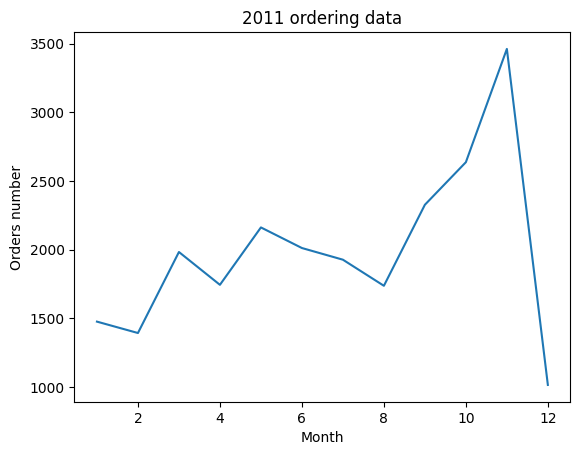

In [156]:
# Visualizing 2011 data
plt.plot(months,data2011)
plt.title('2011 ordering data')
plt.xlabel('Month')
plt.ylabel('Orders number')
plt.show()

In [157]:
# Top 10 countries which are generating the highest revenue. also view the quantity sold along with the revenue generated. excluding the United Kingdom
cntry_rev = cntry_rev.drop(['United Kingdom'])

In [158]:
cnt = cntry_rev.index.tolist()
val = cntry_rev.values.tolist()

In [159]:
values = [val[i][0] for i in range(len(val))]
for i in range(len(val)):
    values.append(val[i][0])

In [160]:
others = round(sum(values[10:]))

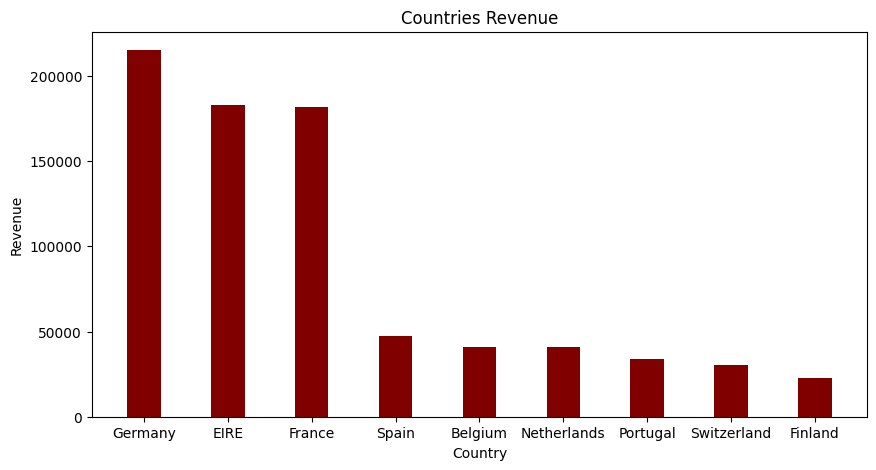

In [161]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(cnt[:9], values[:9], color ='maroon',width = 0.4)
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.title("Countries Revenue")
plt.show()

In [162]:
# Top 10 countries data
cnt_val = cnt[:10] +['others']
val = values[:10] + [others]
relevancy = [value/sum(val) for value in val]

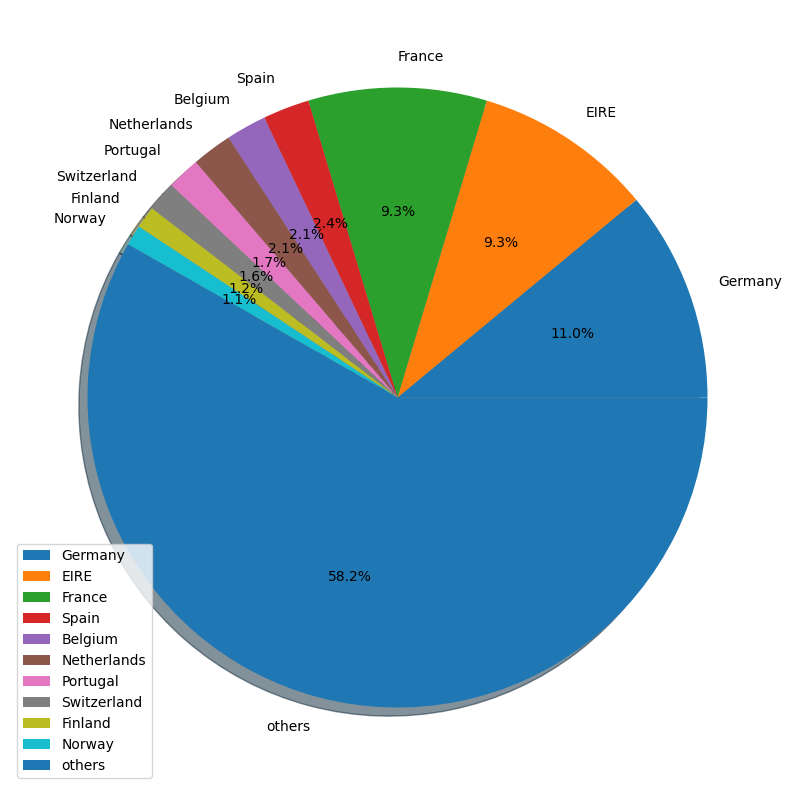

In [167]:
# Visualizing the revenue of the top 10 countries to whole revenue and other countries
fig = plt.figure(figsize = (10, 15))
plt.pie(val, labels = cnt_val,shadow = True,autopct='%1.1f%%')
plt.legend()
plt.show()

In [164]:
# Reviewing the contribution of the top 10 customers to the revenue and to each other 
data['Total_Price'] = data['UnitPrice'] * data['Quantity']
cus_rev = data.groupby('CustomerID').agg({"Total_Price":'sum'}).sort_values("Total_Price",ascending=False)

In [165]:
cus_rev = cus_rev.sort_values("Total_Price",ascending=False).to_records()

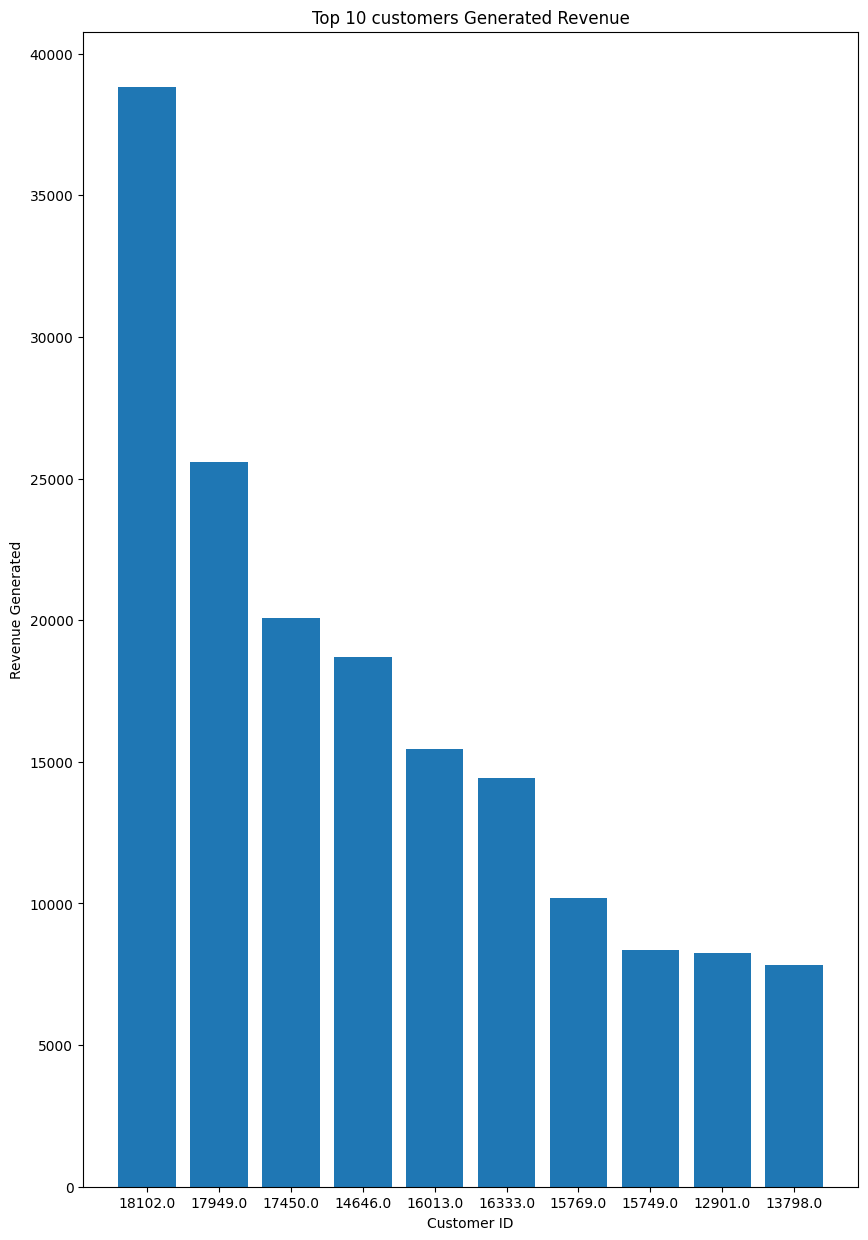

In [166]:
fig = plt.figure(figsize = (10, 15))
plt.bar([str(i[0]) for i in cus_rev[:10]], [i[1] for i in cus_rev[:10]])
plt.xlabel("Customer ID")
plt.ylabel("Revenue Generated")
plt.title("Top 10 customers Generated Revenue")
plt.show()